# ANALISA PENYEBAB HIPERTENSI MENGGUNAKAN ALGORTIMA GRADIEN BOOSTING

# 1. Load Dataset

1.1 Mengimport berbagai library dan pustaka.

In [140]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

1.2 Menghubungkan collab dengan drive

In [141]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1.3 Memuat datset

In [142]:
df = pd.read_csv('/content/drive/MyDrive/Data Mining/Dataset/Hypertension-risk-model-main.csv')

#menampilkan 5 baris pertama pada dataset
df.head()

male  age  currentSmoker  cigsPerDay  BPMeds  diabetes  totChol  sysBP  \
0     1   39              0         0.0     0.0         0    195.0  106.0   
1     0   46              0         0.0     0.0         0    250.0  121.0   
2     1   48              1        20.0     0.0         0    245.0  127.5   
3     0   61              1        30.0     0.0         0    225.0  150.0   
4     0   46              1        23.0     0.0         0    285.0  130.0   

   diaBP    BMI  heartRate  glucose  Risk  
0   70.0  26.97       80.0     77.0     0  
1   81.0  28.73       95.0     76.0     0  
2   80.0  25.34       75.0     70.0     0  
3   95.0  28.58       65.0    103.0     1  
4   84.0  23.10       85.0     85.0     0

# 2. Pre-Processing

2.1 Menampilkan type kolom

Dalam dataset ini semua fitur yang ada memiliki type data int dan float, akan tetapi di karenakan adanya nilai null/nan membuat kolom yang memiliki nilai null/nan berubah jadi string. Maka dari itu di butuhkan konversi untuk mendeteksi nilai null.

In [143]:
# Menampilkan tipe data setiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   male           4240 non-null   int64  
 1   age            4240 non-null   int64  
 2   currentSmoker  4240 non-null   int64  
 3   cigsPerDay     4211 non-null   float64
 4   BPMeds         4187 non-null   float64
 5   diabetes       4240 non-null   int64  
 6   totChol        4190 non-null   float64
 7   sysBP          4240 non-null   float64
 8   diaBP          4240 non-null   float64
 9   BMI            4221 non-null   float64
 10  heartRate      4239 non-null   float64
 11  glucose        3852 non-null   float64
 12  Risk           4240 non-null   int64  
dtypes: float64(8), int64(5)
memory usage: 430.8 KB


2.2 Menghitung fitur dan baris data

In [144]:
# Menghitung jumlah baris dan kolom
num_rows = df.count()
num_cols = len(df.columns)

print(f"Jumlah Baris: {num_rows}")
print(f"Jumlah Kolom: {num_cols}")


Jumlah Baris: male             4240
age              4240
currentSmoker    4240
cigsPerDay       4211
BPMeds           4187
diabetes         4240
totChol          4190
sysBP            4240
diaBP            4240
BMI              4221
heartRate        4239
glucose          3852
Risk             4240
dtype: int64
Jumlah Kolom: 13


2.3 Menghitung jumlah null setiap fitur

In [145]:
# Menghitung jumlah nilai null pada setiap kolom

for col_name in df.columns:
    null_count = df[col_name].isnull().sum()
    print(f"Jumlah nilai null di kolom '{col_name}': {null_count}")

Jumlah nilai null di kolom 'male': 0
Jumlah nilai null di kolom 'age': 0
Jumlah nilai null di kolom 'currentSmoker': 0
Jumlah nilai null di kolom 'cigsPerDay': 29
Jumlah nilai null di kolom 'BPMeds': 53
Jumlah nilai null di kolom 'diabetes': 0
Jumlah nilai null di kolom 'totChol': 50
Jumlah nilai null di kolom 'sysBP': 0
Jumlah nilai null di kolom 'diaBP': 0
Jumlah nilai null di kolom 'BMI': 19
Jumlah nilai null di kolom 'heartRate': 1
Jumlah nilai null di kolom 'glucose': 388
Jumlah nilai null di kolom 'Risk': 0


Terdapat beberapa data yang null dalam datset sehingga perlu di lakukan penormalan data pada tahap pre-procesing agar data lebih mudah di olah dengan metode yang akan di lakukan.

2.4 Konversi fitur string menjadi float dan mengisi nilai null/nilai yang tidak valid

In [146]:
# Mengubah nilai kosong atau tidak valid menjadi 0, lalu mengonversinya ke float

for col_name in ["cigsPerDay", "BPMeds", "totChol", "BMI", "heartRate", "glucose"]:
    df[col_name] = pd.to_numeric(df[col_name], errors='coerce').fillna(0).astype(float)

In [147]:
# Menghitung jumlah nilai null pada setiap kolom setelah di isi nilai 0

for col_name in df.columns:
    null_count = df[col_name].isnull().sum()
    print(f"Jumlah nilai null di kolom '{col_name}': {null_count}")

Jumlah nilai null di kolom 'male': 0
Jumlah nilai null di kolom 'age': 0
Jumlah nilai null di kolom 'currentSmoker': 0
Jumlah nilai null di kolom 'cigsPerDay': 0
Jumlah nilai null di kolom 'BPMeds': 0
Jumlah nilai null di kolom 'diabetes': 0
Jumlah nilai null di kolom 'totChol': 0
Jumlah nilai null di kolom 'sysBP': 0
Jumlah nilai null di kolom 'diaBP': 0
Jumlah nilai null di kolom 'BMI': 0
Jumlah nilai null di kolom 'heartRate': 0
Jumlah nilai null di kolom 'glucose': 0
Jumlah nilai null di kolom 'Risk': 0


Setelah diisi dengan nilai nol, nilai null/nilai yang tidak valid sudah tidak ada. Hal ini memudahkan untuk pengolahan data selanjutnya.

2.5 deskripsi umum fitur

In [148]:
# Menampilkan statistik deskriptif untuk setiap kolom numerik
df.describe()

male          age  currentSmoker   cigsPerDay       BPMeds  \
count  4240.000000  4240.000000    4240.000000  4240.000000  4240.000000   
mean      0.429245    49.580189       0.494104     8.944340     0.029245   
std       0.495027     8.572942       0.500024    11.904777     0.168513   
min       0.000000    32.000000       0.000000     0.000000     0.000000   
25%       0.000000    42.000000       0.000000     0.000000     0.000000   
50%       0.000000    49.000000       0.000000     0.000000     0.000000   
75%       1.000000    56.000000       1.000000    20.000000     0.000000   
max       1.000000    70.000000       1.000000    70.000000     1.000000   

          diabetes      totChol        sysBP        diaBP          BMI  \
count  4240.000000  4240.000000  4240.000000  4240.000000  4240.000000   
mean      0.025708   233.908255   132.354599    82.897759    25.685184   
std       0.158280    51.166237    22.033300    11.910394     4.420501   
min       0.000000     0.000000    83.500000    48.000000     0.000000   
25%       0.000000   205.000000   117.000000    75.000000    23.050000   
50%       0.000000   233.000000   128.000000    82.000000    25.380000   
75%       0.000000   262.000000   144.000000    90.000000    28.032500   
max       1.000000   696.000000   295.000000   142.500000    56.800000   

         heartRate      glucose         Risk  
count  4240.000000  4240.000000  4240.000000  
mean     75.861085    74.463208     0.310613  
std      12.080265    32.862256     0.462799  
min       0.000000     0.000000     0.000000  
25%      68.000000    68.000000     0.000000  
50%      75.000000    77.000000     0.000000  
75%      83.000000    85.000000     1.000000  
max     143.000000   394.000000     1.000000

2.6 cek data duplikat dalam dataset

In [149]:
duplicate_rows_df = df[df.duplicated()]
print(f"Jumlah duplikat di seluruh dataset: {len(duplicate_rows_df)}")

Jumlah duplikat di seluruh dataset: 0


# 3. Ekplorasi data

3.1 Visualisasi matrix korelasi

Visualisasi di bawah menunjukan korelasi tiap fiitur, korelasi tertinggi terhadap fitur risk berada pada sysBp dengan nila 0,7 dan diaBp dengan nilai 0,62

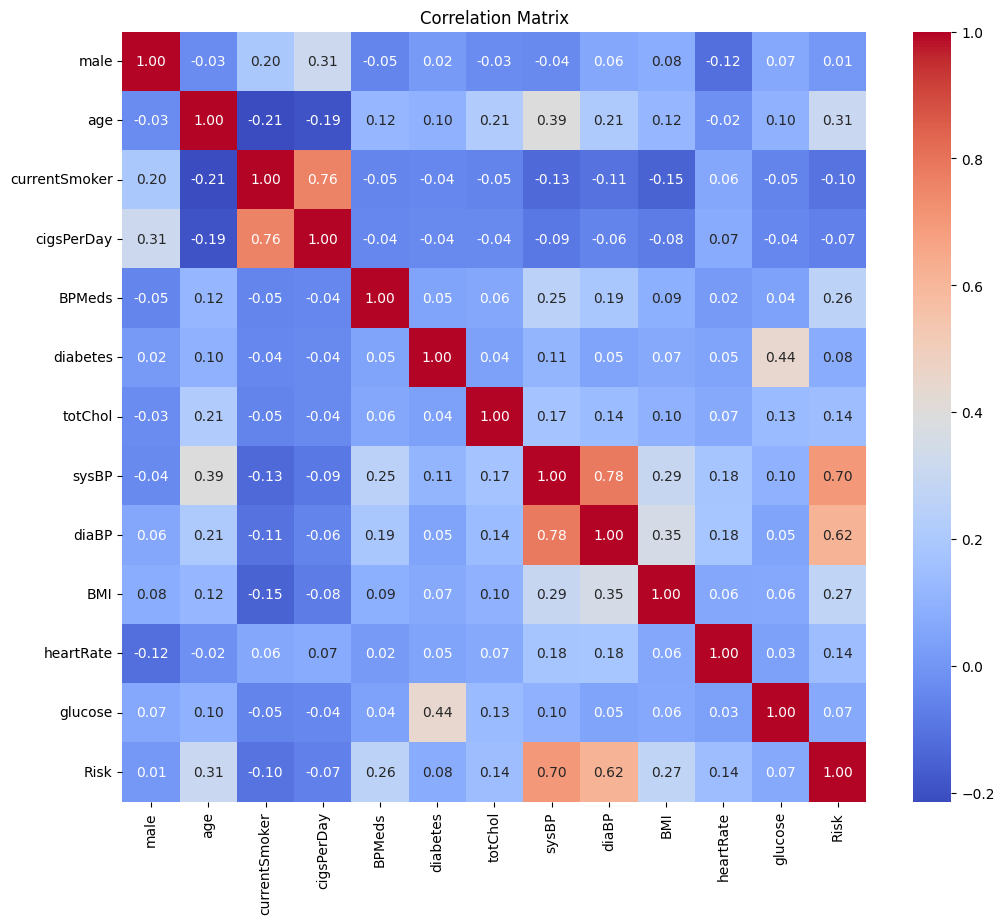

In [150]:
# Hitung matriks korelasi
corr_matrix = df.corr()

# Visualisasi matriks korelasi
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


Korelasi Antar Fitur
Heatmap ini menunjukkan korelasi antara variabel-variabel dalam dataset. Nilai korelasi berkisar antara -1 hingga 1:

- Fitur sysBP memiliki korelasi yang kuat dengan diaBP (0.78), menunjukkan hubungan erat antara tekanan sistolik dan diastolik.
- age memiliki korelasi moderat dengan sysBP (0.39) dan Risk (0.31), menunjukkan bahwa usia lebih tua cenderung meningkatkan tekanan darah sistolik dan risiko hipertensi.
- diabetes menunjukkan korelasi moderat dengan glucose (0.62), sesuai dengan hubungan biologis antara diabetes dan kadar glukosa darah.
- Korelasi antara sebagian besar variabel lainnya relatif rendah, menandakan hubungan lemah.


3.2 Remove outliers

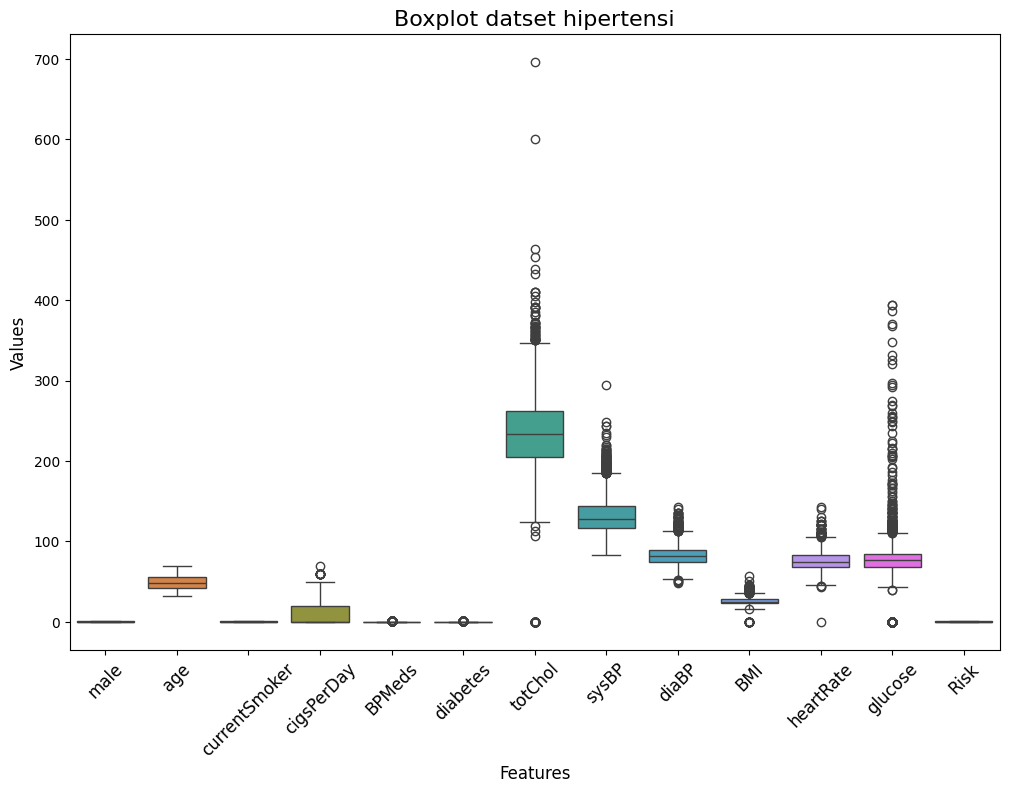

In [151]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.title("Boxplot datset hipertensi", fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.xlabel("Features", fontsize=12)
plt.show()

In [152]:
def remove_outliers(df, columns):
    for column in columns:
        # Hitung Q1 dan Q3 menggunakan approxQuantile
        q1, q3 = df.approxQuantile(column, [0.25, 0.75], 0)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Ganti nilai outlier dengan batas bawah atau atas
        df = df.withColumn(
            column,
            when(col(column) < lower_bound, lower_bound)
            .when(col(column) > upper_bound, upper_bound)
            .otherwise(col(column))
        )

    return df

<ipython-input-153-6d25307895fa>:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '49.58018867924528' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[outliers, column] = mean_value


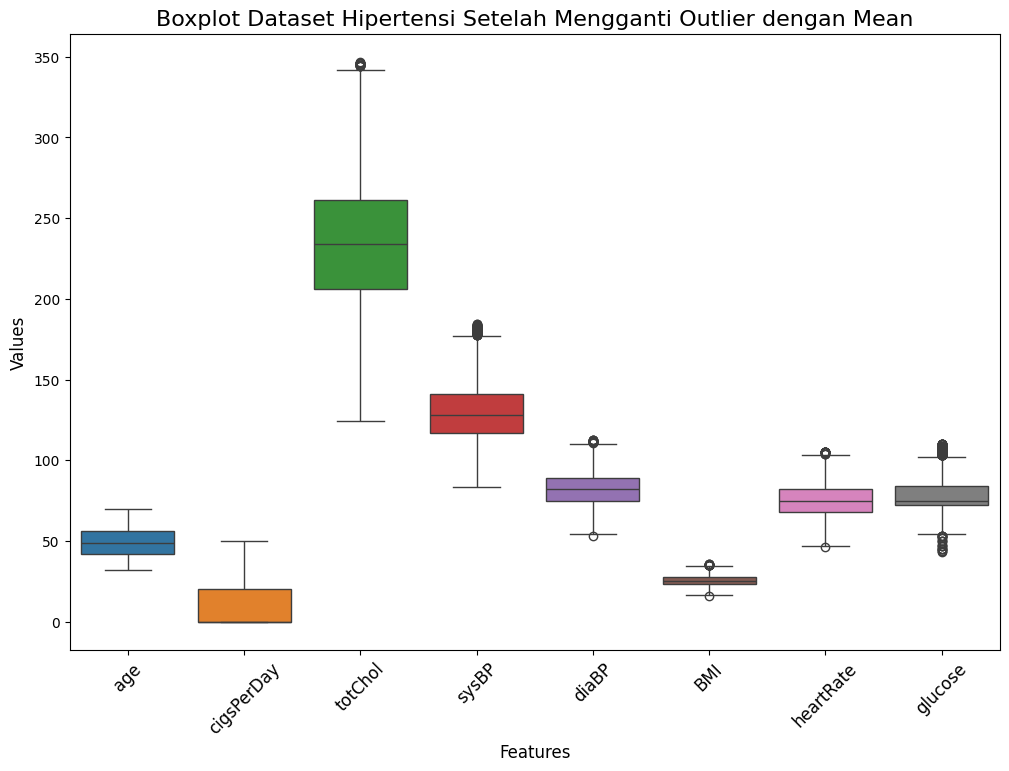

In [153]:
# Fungsi untuk mengganti outlier dengan mean menggunakan IQR
def replace_outliers_with_mean(df, columns):
    for column in columns:
        # Hitung Q1, Q3, dan IQR
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identifikasi nilai outlier
        outliers = (df[column] < lower_bound) | (df[column] > upper_bound)

        # Ganti nilai outlier dengan mean kolom
        mean_value = df[column].mean()
        df.loc[outliers, column] = mean_value

    return df

# Mendefinisikan kolom untuk penghapusan outlier
columns_to_clean = ["age", "cigsPerDay", "totChol", "sysBP", "diaBP", "BMI", "heartRate", "glucose"]

# Contoh penggunaan: Ganti outlier dengan mean
df = replace_outliers_with_mean(df, columns_to_clean)

# Visualisasi setelah mengganti outlier
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[columns_to_clean])  # Gunakan df dengan kolom yang sudah dibersihkan
plt.title("Boxplot Dataset Hipertensi Setelah Mengganti Outlier dengan Mean", fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.xlabel("Features", fontsize=12)
plt.show()


3.3 Vsiualisasi pie chart

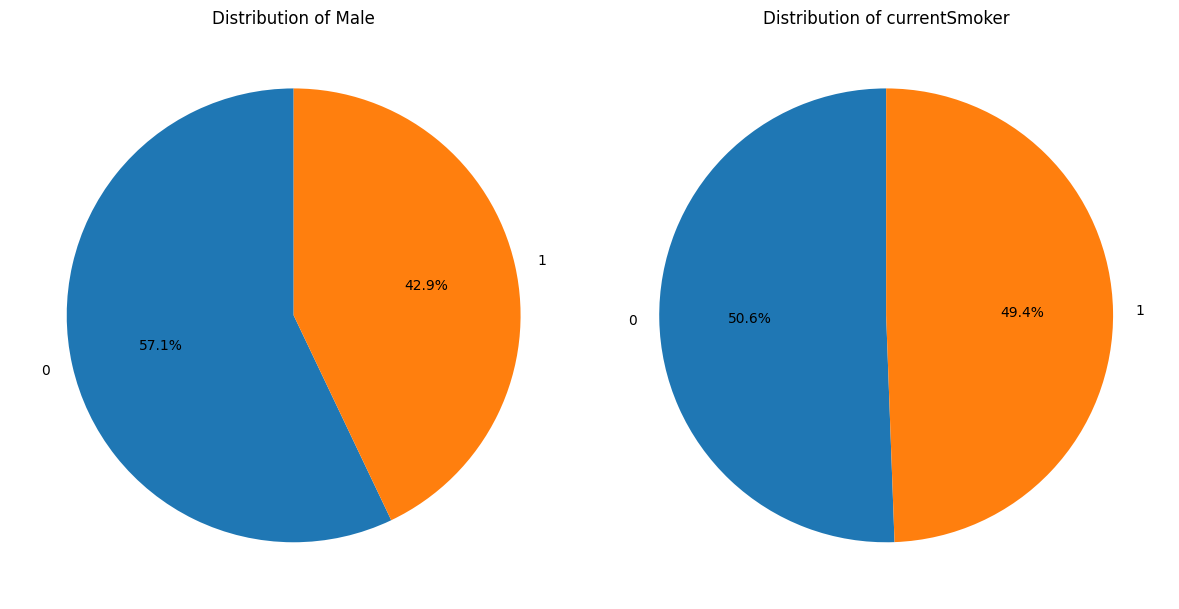

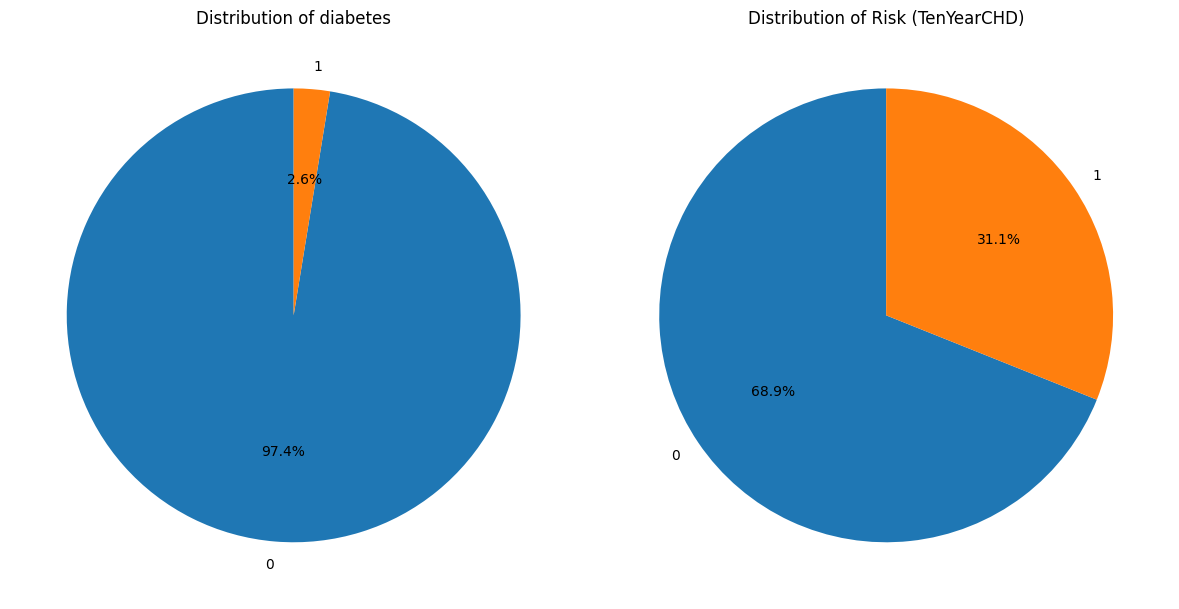

In [154]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
male_counts = df['male'].value_counts()
plt.pie(male_counts, labels=male_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Male')

plt.subplot(1, 2, 2)
currentSmoker_counts = df['currentSmoker'].value_counts()
plt.pie(currentSmoker_counts, labels=currentSmoker_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of currentSmoker')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
diabetes_counts = df['diabetes'].value_counts()
plt.pie(diabetes_counts, labels=diabetes_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of diabetes')

plt.subplot(1, 2, 2)

# Assuming 'Risk' represents the risk column (previously TenYearCHD)
risk_counts = df['Risk'].value_counts()  # Changed 'TenYearCHD' to 'Risk'
plt.pie(risk_counts, labels=risk_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Risk (TenYearCHD)') # Kept the original title with clarification
plt.tight_layout()
plt.show()

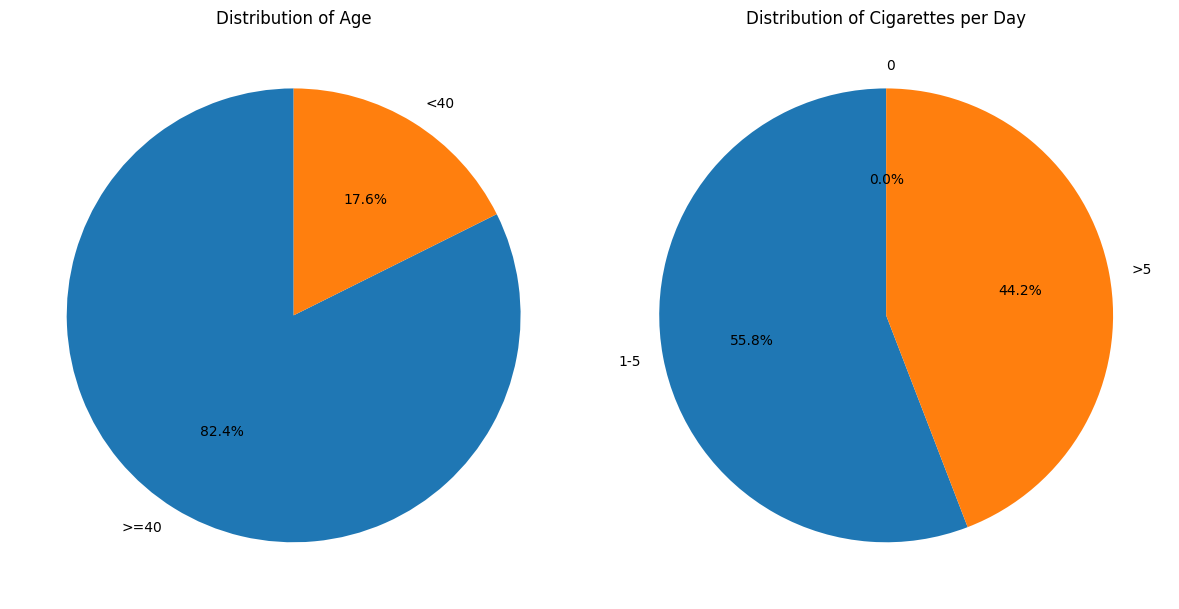

In [155]:
df['age_category'] = pd.cut(df['age'], bins=[0, 40, df['age'].max()], labels=['<40', '>=40'])


df['cigsPerDay'] = pd.to_numeric(df['cigsPerDay'], errors='coerce')
max_cigs = df['cigsPerDay'].max()

if np.isnan(max_cigs):
    max_cigs = 0

bins = [-1, 0, 5, max_cigs + 1]
df['cigsPerDay_category'] = pd.cut(df['cigsPerDay'], bins=bins, labels=['0', '1-5', '>5'], right=False, include_lowest=True, duplicates='drop')


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
age_counts = df['age_category'].value_counts()
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Age')

plt.subplot(1, 2, 2)
cigs_counts = df['cigsPerDay_category'].value_counts()
plt.pie(cigs_counts, labels=cigs_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Cigarettes per Day')

plt.tight_layout()
plt.show()

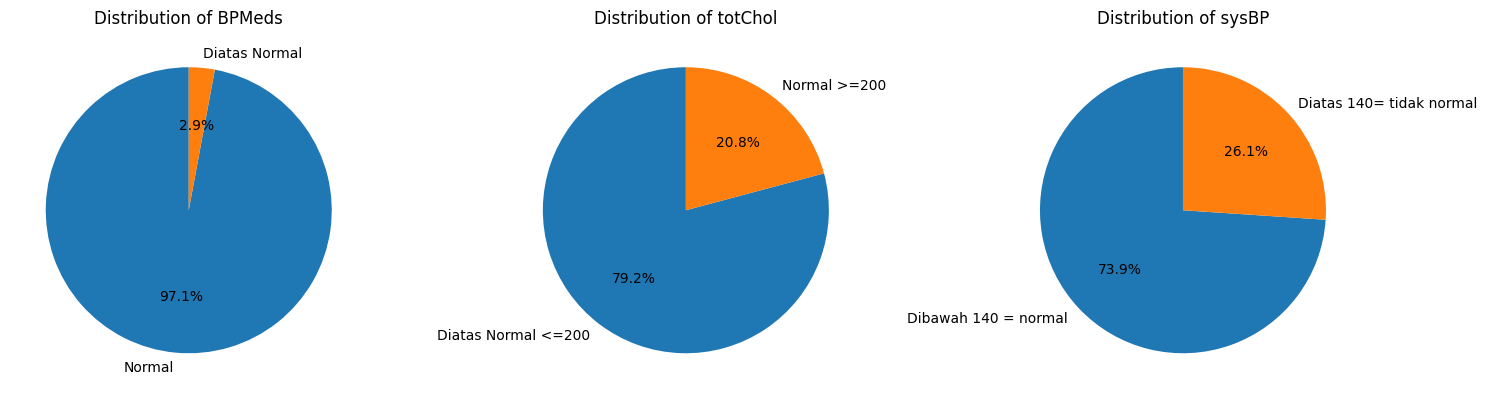

In [156]:
# Convert 'BPMeds' to numeric, handling errors
df['BPMeds'] = pd.to_numeric(df['BPMeds'], errors='coerce')

# Calculate max_bpm, handling NaN values
max_bpm = df['BPMeds'].max()
max_bpm = 0 if np.isnan(max_bpm) else max_bpm  # Replace NaN with 0

bins_bpm = [-1, 0.5, max_bpm + 1] if max_bpm > 0.5 else [-1, 0.5, 1]  # Add 1 if max_bpm > 0.5, otherwise use 1

df['BPMeds_category'] = pd.cut(df['BPMeds'], bins=bins_bpm, labels=['Normal', 'Diatas Normal'], include_lowest=True, duplicates='drop')

# Ensure bins are monotonically increasing for totChol
# Convert 'totChol' to numeric, handling errors
df['totChol'] = pd.to_numeric(df['totChol'], errors='coerce')

max_totchol = df['totChol'].max()
max_totchol = 0 if np.isnan(max_totchol) else max_totchol  # Replace NaN with 0

bins_totchol = [-1, 200, max_totchol + 1] if max_totchol > 200 else [-1, 200, 201]  # Add 1 if max_totchol > 200, otherwise use 201

df['totChol_category'] = pd.cut(df['totChol'], bins=bins_totchol, labels=['Normal >=200', 'Diatas Normal <=200'], include_lowest=True, duplicates='drop')

df['sisbp_category'] = pd.cut(df['sysBP'], bins=[-1, 140, df['sysBP'].max()], labels=['Dibawah 140 = normal', 'Diatas 140= tidak normal'], include_lowest=True, duplicates='drop')


plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
bpm_counts = df['BPMeds_category'].value_counts()
plt.pie(bpm_counts, labels=bpm_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of BPMeds')

plt.subplot(1, 3, 2)
totchol_counts = df['totChol_category'].value_counts()
plt.pie(totchol_counts, labels=totchol_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of totChol')

plt.subplot(1, 3, 3)
sisbp_counts = df['sisbp_category'].value_counts()
plt.pie(sisbp_counts, labels=sisbp_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of sysBP')

plt.tight_layout()
plt.show()

3.4 Visualisasi scater plot

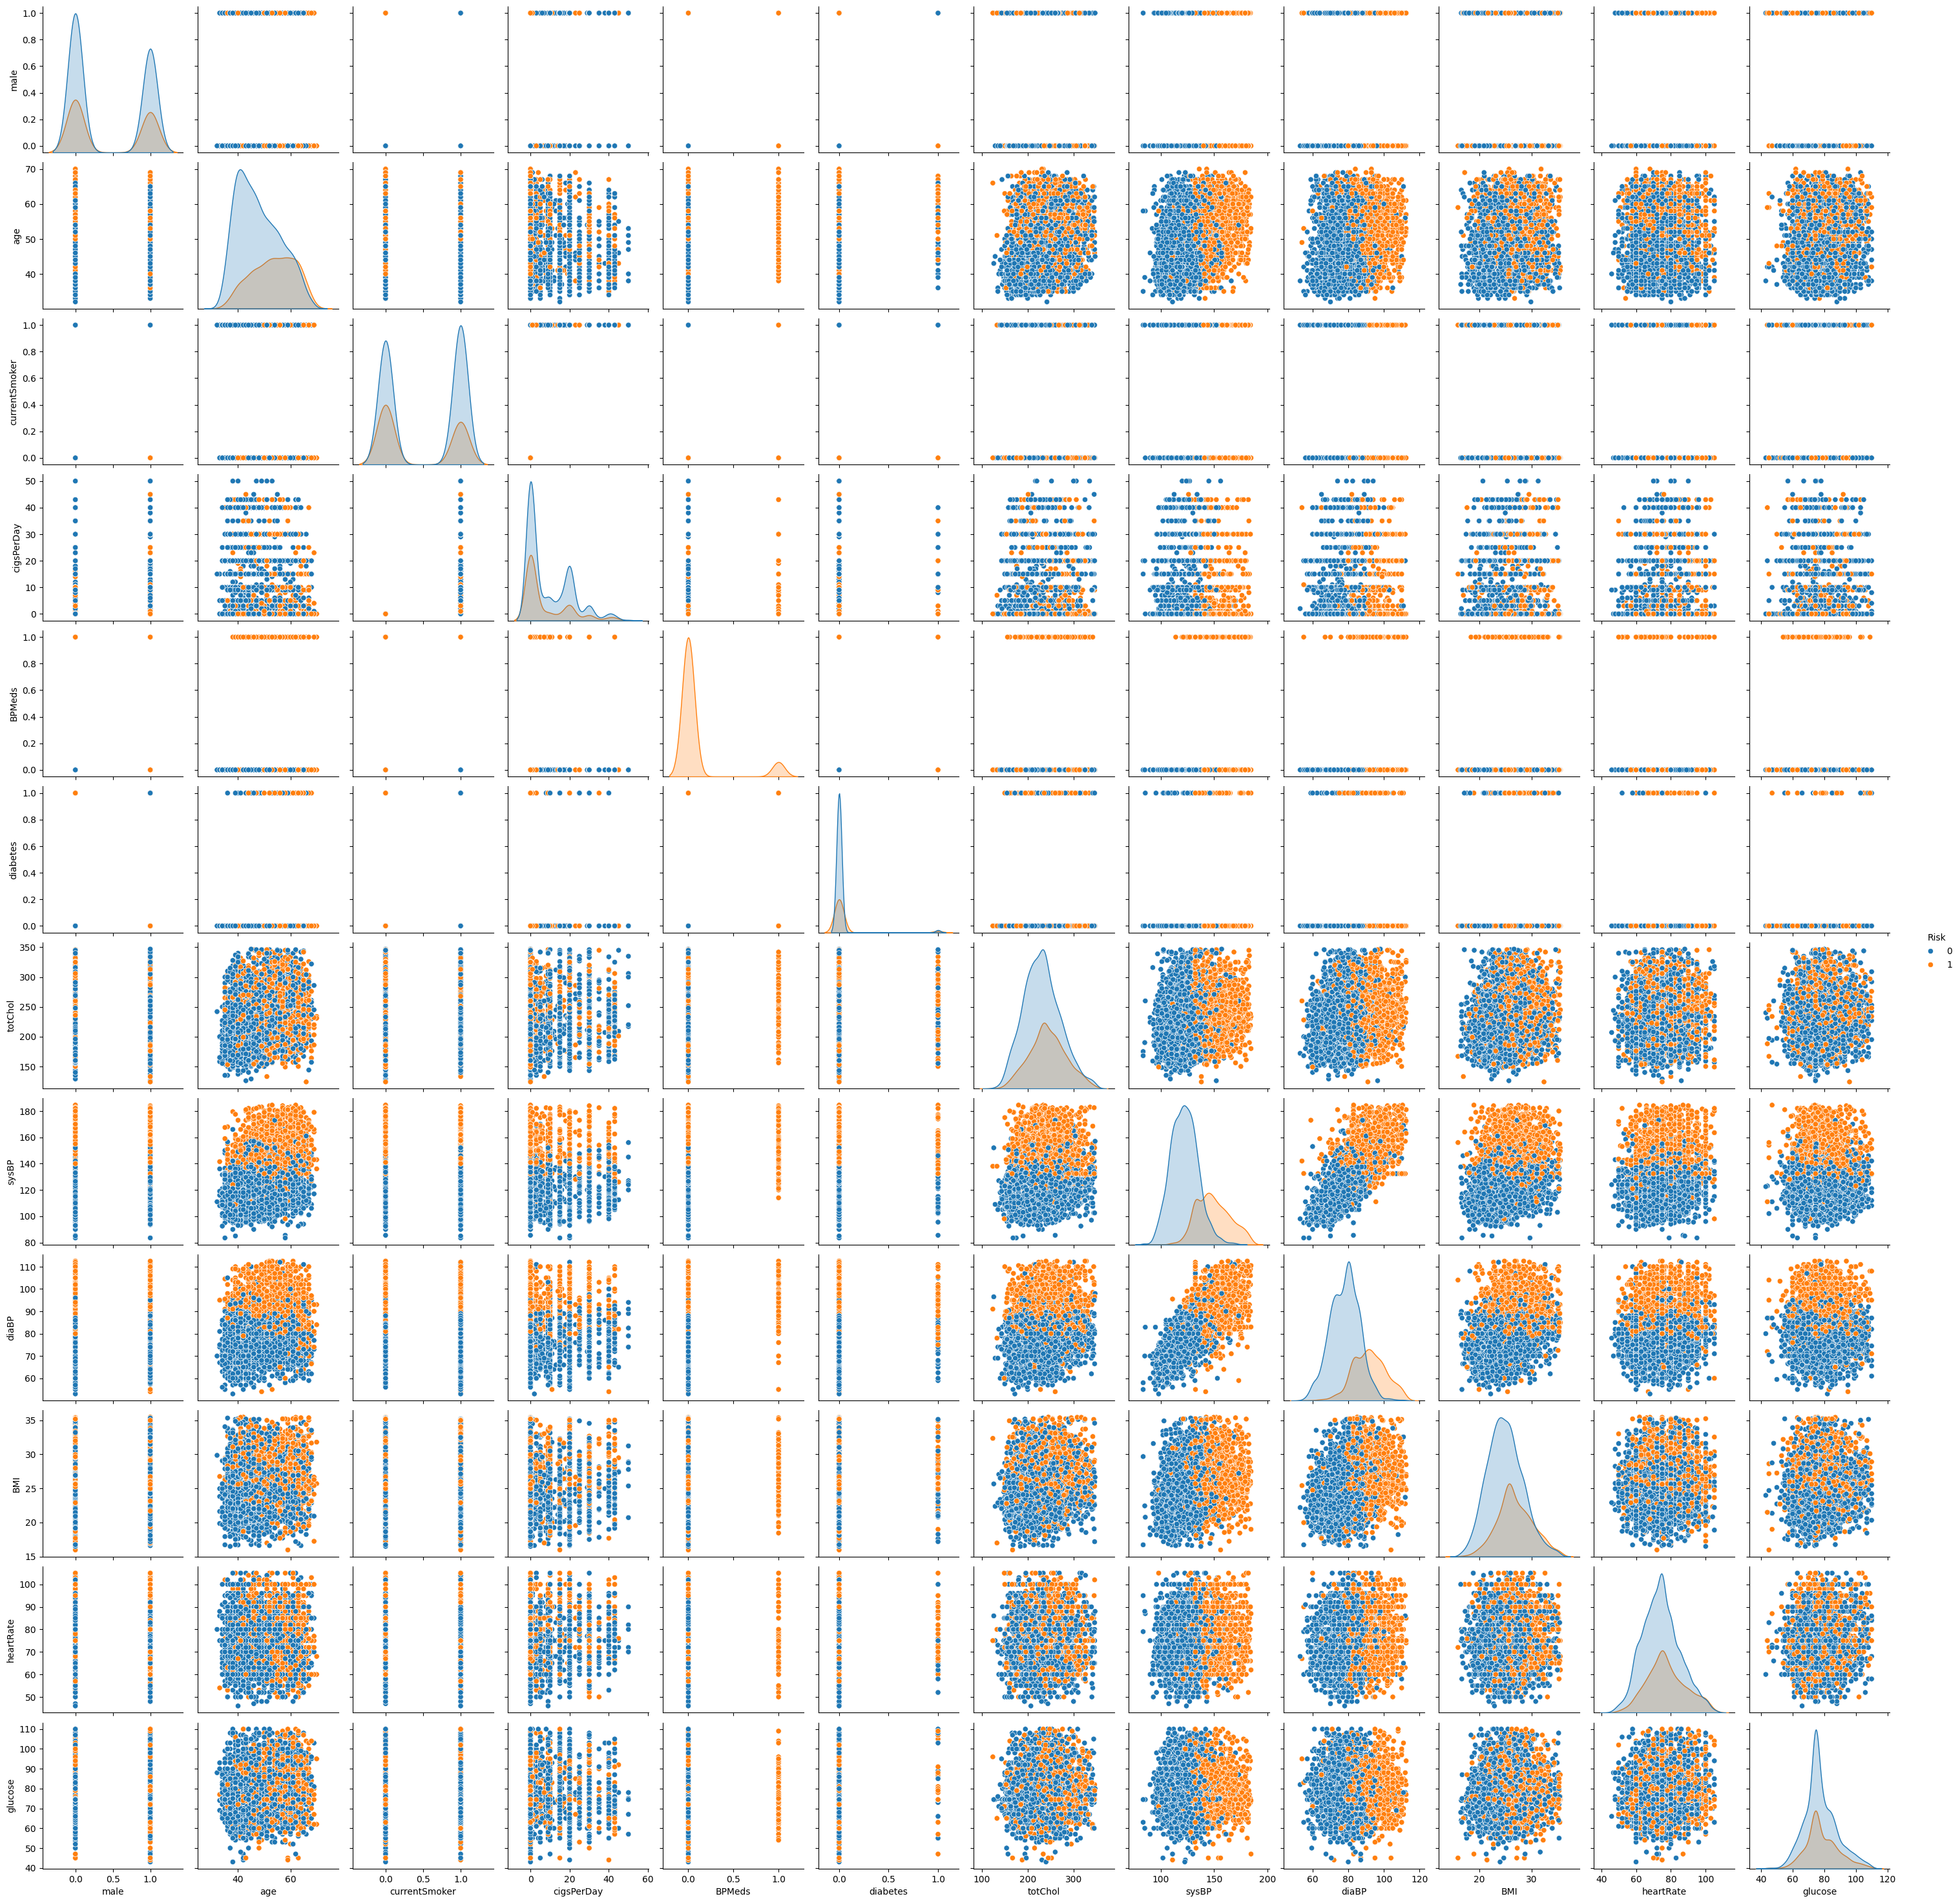

In [159]:
sns.pairplot(df, hue='Risk')
plt.show()

# 4. Spiliting data, Seleksi Fitur, dan Over Sampling

4.1 Membagi data set menjadi 2 ( Spliting data)

In [160]:
from sklearn.model_selection import train_test_split

features = ['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'diabetes',
            'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
X = df[features]
y = df['Risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

4.2 Feature selection

In [161]:
from sklearn.ensemble import GradientBoostingClassifier

gboost = GradientBoostingClassifier(random_state=42)
gboost.fit(X_train, y_train)

# Dapatkan feature importance
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': gboost.feature_importances_
})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print(feature_importances)


          Feature  Importance
7           sysBP    0.749196
8           diaBP    0.138120
4          BPMeds    0.037920
9             BMI    0.019292
1             age    0.015695
10      heartRate    0.011561
11        glucose    0.010723
6         totChol    0.009261
3      cigsPerDay    0.006116
0            male    0.001690
5        diabetes    0.000290
2   currentSmoker    0.000138


In [162]:
selected_features = feature_importances[feature_importances['Importance'] > 0.01]['Feature'].tolist()

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


4.3 Cek Over sampling

Dari hasil ouput di bawah , perlu adanya balancing data. hal ini di karenakan data risk 0 lebih dominan yang membuat model akan lebih memahami individu yang tidak terkena hipotensi

Risk
0    2923
1    1317
Name: count, dtype: int64


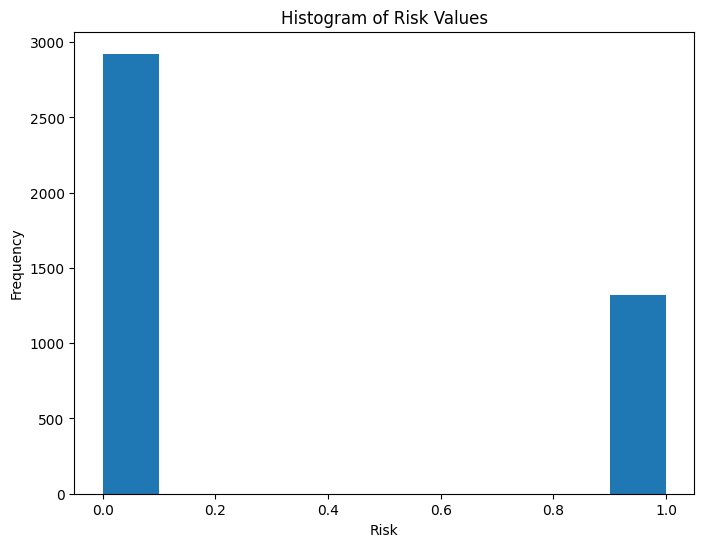

In [163]:
import matplotlib.pyplot as plt

print(y.value_counts())


plt.figure(figsize=(8, 6))
plt.hist(y, bins=10)
plt.xlabel('Risk')
plt.ylabel('Frequency')
plt.title('Histogram of Risk Values')
plt.show()

4.3 balancing data dan splitting train dan test

In [164]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_selected, y_train)

In [165]:
df_resampled = pd.DataFrame(X_resampled, columns=features)
df_resampled['Risk'] = y_resampled

train_df, test_df = train_test_split(df_resampled, test_size=0.2, random_state=42, stratify=df_resampled['Risk'])

X_train = df_resampled[selected_features]
y_train = df_resampled['Risk']
X_test = test_df[selected_features]
y_test = test_df['Risk']

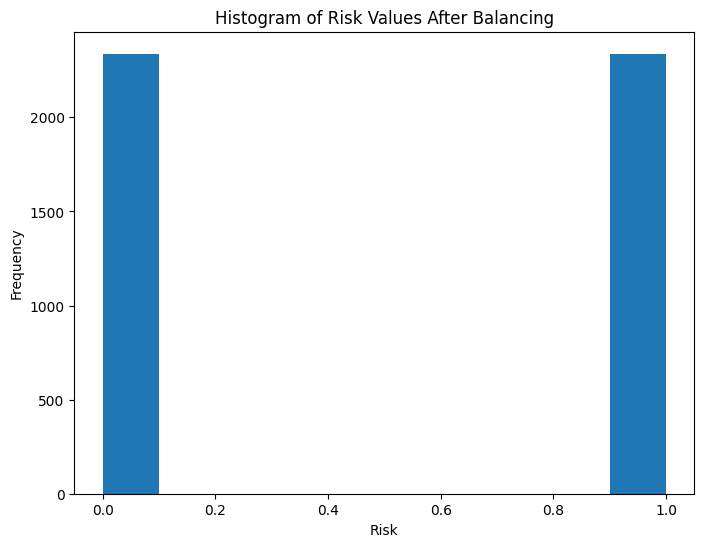

In [166]:
plt.figure(figsize=(8, 6))
plt.hist(y_resampled, bins=10)
plt.xlabel('Risk')
plt.ylabel('Frequency')
plt.title('Histogram of Risk Values After Balancing')
plt.show()

# 6. Gardient BOosting

Akurasi Model: 0.92

Classification Report:
              precision    recall  f1-score   support

    Negative       0.92      0.92      0.92       468
    Positive       0.92      0.92      0.92       468

    accuracy                           0.92       936
   macro avg       0.92      0.92      0.92       936
weighted avg       0.92      0.92      0.92       936



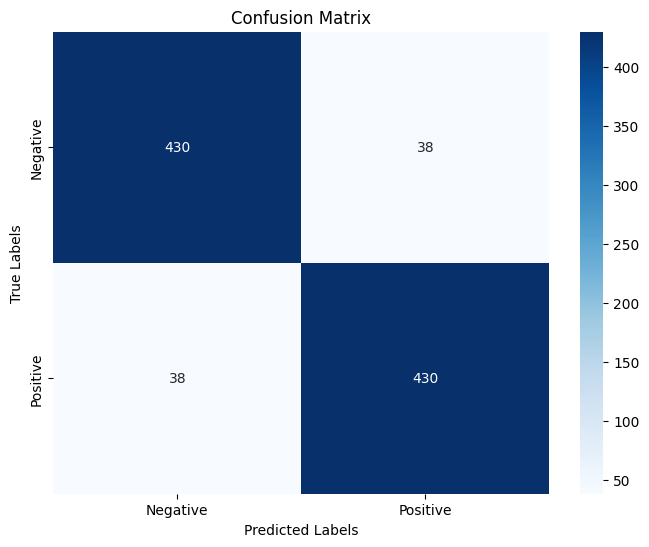

In [167]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

gbt_classifier = GradientBoostingClassifier(random_state=42)

gbt_classifier.fit(X_train, y_train)

y_pred = gbt_classifier.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {accuracy:.2f}")

# Classification Report
report = classification_report(y_test, y_pred, target_names=["Negative", "Positive"])
print("\nClassification Report:")
print(report)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()
